In [1]:
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt
import glob

In [2]:
data = np.load('/home/ybadoux/Documents/MRP/ALICE_spm/results_semi-major_1.0 au.npy')
data

array([ ( 1.,  9.89039923,   0.7402513 ,  2.15745559,  0.34534795,  0.07694167,  2.44798924,  2.90514871,  79.6, 1,    0),
       ( 1.,  9.89039923,   0.56266061,  4.42118539,  0.38688811,  5.76349694,  5.56961074,  4.35512302,  80.4, 1,    1),
       ( 1.,  9.89039923,   0.84373794,  4.58442437,  1.48323475,  0.88753444,  3.8969937 ,  1.282018  ,  82.8, 0,    2),
       ...,
       ( 1.,  9.89039923,  10.36376838,  0.97182968,  0.68719858,  4.23205916,  1.42630031,  5.5293508 ,  50.7, 0, 1207),
       ( 1.,  9.89039923,  10.27704863,  2.52979109,  0.49666315,  2.59538113,  2.91632685,  6.09764426,  50.8, 0, 1208),
       ( 1.,  9.89039923,  10.70612099,  4.94727917,  0.27793683,  2.60191513,  3.28995404,  3.09955729,  50.6, 0, 1209)],
      dtype=[('a_sp', '<f8'), ('v20', '<f8'), ('b', '<f8'), ('phi', '<f8'), ('theta', '<f8'), ('psi', '<f8'), ('f_pl', '<f8'), ('f_moon', '<f8'), ('end_time', '<f8'), ('state', 'u1'), ('index', '<u4')])

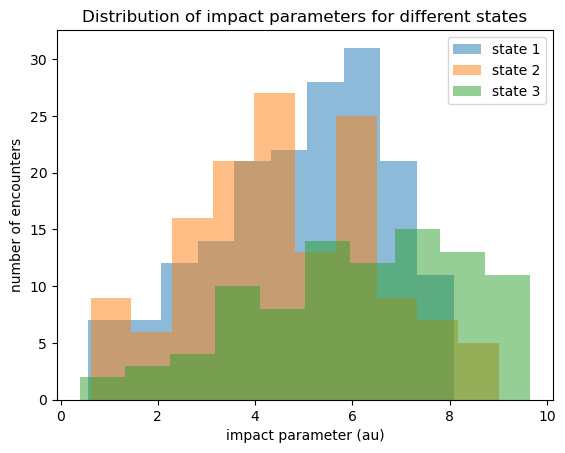

In [3]:
for i in range(1,4):
    plt.hist(data['b'][data['state']==i], label = f'state {i}', alpha=0.5)

plt.xlabel('impact parameter (au)')
plt.ylabel('number of encounters')
plt.title('Distribution of impact parameters for different states')
plt.legend()
plt.show()

In [4]:
def cross_section(data, state, normalize=False, a_sp=None):
    state_mask = data['state']==state
    und_mask = (data['state']==-1) | (data['state']==-3) #Failed or Timeout

    b_max = np.max(data['b'][state_mask]) | units.AU

    cs = np.pi * b_max**2 * np.sum(state_mask) / len(state_mask)
    stat_error = 1/np.sqrt(np.sum(state_mask)) * cs
    system_error = np.pi * b_max**2 * np.sum(und_mask) / len(state_mask)

    if normalize and a_sp is not None:
        cs /= np.pi * a_sp**2
        stat_error /= np.pi * a_sp**2
        system_error /= np.pi * a_sp**2
    if normalize and a_sp is None:
        raise ValueError("a_sp must be provided for normalization")

    return cs, stat_error, system_error

In [5]:
state_dict = {0: ('Other', 'Other'),
              1: ('FFPM', 'Free Floating Planet Moon Pair'),
              2: ('FFPWM', 'Free Floating Planet Without Moon'),
              3: ('FFMBP', 'Free Floating Moon, Bound Planet')}

In [6]:
for i in range(1,4):
    cs, stat_error, system_error = cross_section(data, i)
    print(f"Cross section for {state_dict[i][0]}: {cs.value_in(units.AU**2)} ± {stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2)} AU^2")

Cross section for FFPM: 29.47170320325287 ± 2.23424405393241 AU^2
Cross section for FFPWM: 29.12910606060993 ± 2.479634176925845 AU^2
Cross section for FFMBP: 22.287874406129568 ± 2.32367153618589 AU^2


Cross section for FFPM at 1.0 AU: 29.47170320325287 ± 2.23424405393241 AU^2
Cross section for FFPWM at 1.0 AU: 29.12910606060993 ± 2.479634176925845 AU^2
Cross section for FFMBP at 1.0 AU: 22.287874406129568 ± 2.32367153618589 AU^2
Cross section for FFPM at 2.0 AU: 151.72435671094908 ± 11.77609392236583 AU^2
Cross section for FFPWM at 2.0 AU: 78.86958788273238 ± 7.847817311985383 AU^2
Cross section for FFMBP at 2.0 AU: 41.89328064131078 ± 6.54263123560862 AU^2
Cross section for FFPM at 5.0 AU: 526.3342193112557 ± 54.28722964306644 AU^2
Cross section for FFPWM at 5.0 AU: 179.22536214700412 ± 27.990299032345412 AU^2
Cross section for FFMBP at 5.0 AU: 138.50522231768005 ± 31.775277222915875 AU^2
Cross section for FFPM at 10.0 AU: 1708.3778928710833 ± 194.68772948249025 AU^2
Cross section for FFPWM at 10.0 AU: 351.54996348065725 ± 68.94462014579625 AU^2
Cross section for FFMBP at 10.0 AU: 310.67120713327904 ± 98.24286179751115 AU^2
Cross section for FFPM at 20.0 AU: 3872.0914590694224 ± 56

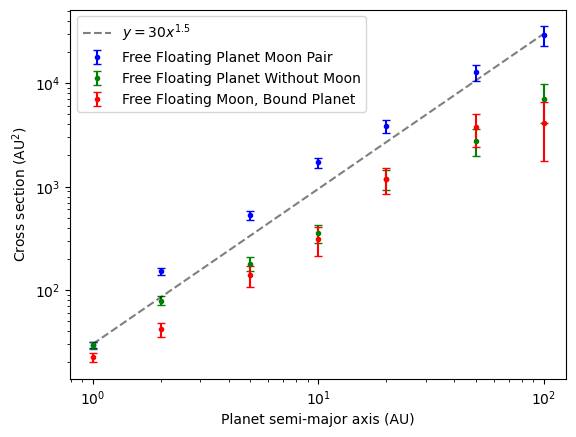

In [7]:
semi_majors = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
clrs = ['blue', 'green', 'red']

def power_law(x, a, b):
    return a * x**b

for semi_major in semi_majors:
    data = np.load(f'/home/ybadoux/Documents/MRP/ALICE_spm/results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i)
        print(f"Cross section for {state_dict[i][0]} at {semi_major} AU: {cs.value_in(units.AU**2)} ± {stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2)} AU^2")

# Plotting the results
fig, ax = plt.subplots()
for j,semi_major in enumerate(semi_majors):
    data = np.load(f'/home/ybadoux/Documents/MRP/ALICE_spm/results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i)
        if j == 1:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2), fmt='.', label=state_dict[i][1], color=clrs[i-1], capsize=3)
        else:
            ax.errorbar(semi_major, cs.value_in(units.AU**2), yerr=stat_error.value_in(units.AU**2) + system_error.value_in(units.AU**2), fmt='.', color=clrs[i-1], capsize=3)

ax.plot(np.array(semi_majors), power_law(np.array(semi_majors), 30, 1.5), 'k--', label=r'$y=30x^{1.5}$', alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Planet semi-major axis (AU)')
ax.set_ylabel(r'Cross section (AU$^2$)')
# ax.set_title('Cross section vs PlanetSemi-major axis')
ax.legend()
plt.savefig('cross_section_vs_semi_major.png')
plt.show()

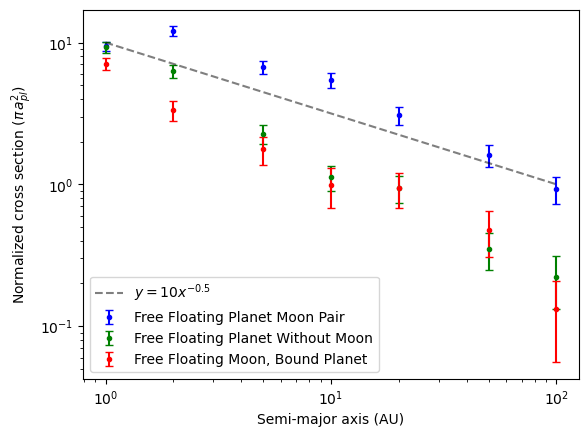

In [8]:
#plot normalized
fig, ax = plt.subplots()
for j,semi_major in enumerate(semi_majors):
    data = np.load(f'/home/ybadoux/Documents/MRP/ALICE_spm/results_semi-major_{semi_major} au.npy')
    for i in range(1,4):
        cs, stat_error, system_error = cross_section(data, i, normalize=True, a_sp=semi_major|units.AU)
        if j == 1:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='.', label=state_dict[i][1], color=clrs[i-1], capsize=3)
        else:
            ax.errorbar(semi_major, cs, yerr=stat_error + system_error, fmt='.', color=clrs[i-1], capsize=3)

ax.plot(np.array(semi_majors), power_law(np.array(semi_majors), 10, -0.5), 'k--', label=r'$y=10x^{-0.5}$', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Normalized cross section ($\pi\, a_{pl}^2$)')
# ax.set_title('Normalized cross section vs Planet semi-major axis')
ax.legend()
plt.savefig('normalized_cross_section_vs_semi_major.png')
plt.show()

Moon survival fraction for semi-major axis 1.0 AU: 0.5576923076923077
Moon survival fraction for semi-major axis 2.0 AU: 0.6217228464419475
Moon survival fraction for semi-major axis 5.0 AU: 0.6962962962962963
Moon survival fraction for semi-major axis 10.0 AU: 0.7475728155339806
Moon survival fraction for semi-major axis 20.0 AU: 0.6811594202898551
Moon survival fraction for semi-major axis 50.0 AU: 0.7272727272727273
Moon survival fraction for semi-major axis 100.0 AU: 0.7777777777777778


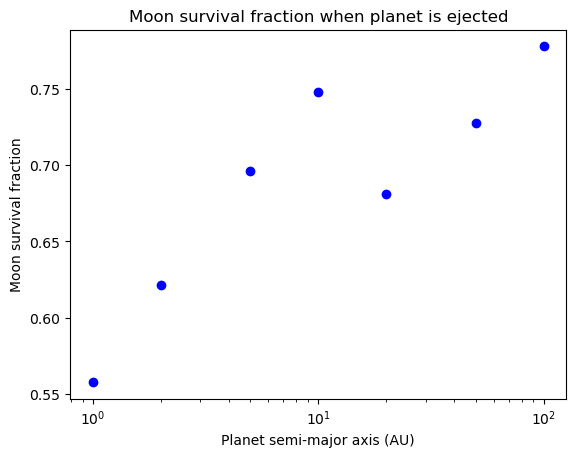

In [11]:
for a in semi_majors:
    data = np.load(f'/home/ybadoux/Documents/MRP/ALICE_spm/results_semi-major_{a} au.npy')
    
    #count planet ejections
    pl_eject_mask = (data['state']==1) | (data['state']==2)
    pm_pair_mask = (data['state']==1)

    moon_survival_frac = np.sum(pm_pair_mask) / np.sum(pl_eject_mask)
    print(f"Moon survival fraction for semi-major axis {a} AU: {moon_survival_frac}")

    plt.scatter(a, moon_survival_frac, color='blue', label='Moon survival fraction')

plt.xscale('log')
plt.xlabel('Planet semi-major axis (AU)')
plt.ylabel('Moon survival fraction')
plt.title('Moon survival fraction when planet is ejected')
# plt.legend()
# plt.savefig('moon_survival_fraction.png')
plt.show()

In [10]:
np.logspace(0, 2, 7)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ])